In [1]:
# Part One: NLTK

In [2]:
# 1.1 Import the required libraries such as Pandas, NLTK, and Scikit-learn.

In [130]:
import pandas as pd
import numpy as np
import nltk
import sklearn
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.decomposition import NMF
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from IPython.display import display, HTML
from sklearn.cluster import KMeans
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /Users/shreyas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shreyas/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreyas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shreyas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shreyas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/shreyas/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/shreyas/nltk_data...
[nltk_data]   Package words is alr

True

In [131]:
# 1.2  Load the "headlines.csv" file into a Pandas data frame.

In [132]:
df = pd.read_csv("headlines.csv")
print(df.head())

       id                                           headline
0  524288  For Some, The Decision To Enlist Offers Direction
1  524289          Whither The Astronauts Without A Shuttle?
2  524292      Tour Winner May Not Be First Over Finish Line
3  262153  California College Students Walk Out Of Class ...
4  524298               New Theory On 'Shaken Baby Syndrome'


In [133]:
# 1.3  Perform text preprocessing on the headlines using NLTK functions such as removing stop words, tokenization, stemming, and lemmatization.

In [134]:
#Remove stop words
stop_words = set(stopwords.words('english'))
df['filtered_headline'] = df['headline'].replace(to_replace=r'[^\w\s]', value='', regex = True)
df['filtered_headline'] = df['filtered_headline'].apply(nltk.word_tokenize)
df['filtered_headline'] = df['filtered_headline'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df['filtered_headline']=df['filtered_headline'].apply(lambda x: ' '.join(x))
print(df.head())

       id                                           headline  \
0  524288  For Some, The Decision To Enlist Offers Direction   
1  524289          Whither The Astronauts Without A Shuttle?   
2  524292      Tour Winner May Not Be First Over Finish Line   
3  262153  California College Students Walk Out Of Class ...   
4  524298               New Theory On 'Shaken Baby Syndrome'   

                                   filtered_headline  
0                   Decision Enlist Offers Direction  
1                 Whither Astronauts Without Shuttle  
2                  Tour Winner May First Finish Line  
3  California College Students Walk Class Protest...  
4                    New Theory Shaken Baby Syndrome  


In [135]:
#Stemming
stemmer = PorterStemmer()
df['stemmed_headline'] = df['filtered_headline'].apply(nltk.word_tokenize)
df['stemmed_headline'] = df['stemmed_headline'].apply(lambda x: [stemmer.stem(word) for word in x])
df['stemmed_headline']=df['stemmed_headline'].apply(lambda x: ' '.join(x))
print(df.head())

       id                                           headline  \
0  524288  For Some, The Decision To Enlist Offers Direction   
1  524289          Whither The Astronauts Without A Shuttle?   
2  524292      Tour Winner May Not Be First Over Finish Line   
3  262153  California College Students Walk Out Of Class ...   
4  524298               New Theory On 'Shaken Baby Syndrome'   

                                   filtered_headline  \
0                   Decision Enlist Offers Direction   
1                 Whither Astronauts Without Shuttle   
2                  Tour Winner May First Finish Line   
3  California College Students Walk Class Protest...   
4                    New Theory Shaken Baby Syndrome   

                                    stemmed_headline  
0                          decis enlist offer direct  
1                   whither astronaut without shuttl  
2                  tour winner may first finish line  
3  california colleg student walk class protest t...  
4  

In [136]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_headline'] = df['filtered_headline'].apply(nltk.word_tokenize)
df['lemmatized_headline'] = df['lemmatized_headline'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['lemmatized_headline']=df['lemmatized_headline'].apply(lambda x: ' '.join(x))
print(df.head())

       id                                           headline  \
0  524288  For Some, The Decision To Enlist Offers Direction   
1  524289          Whither The Astronauts Without A Shuttle?   
2  524292      Tour Winner May Not Be First Over Finish Line   
3  262153  California College Students Walk Out Of Class ...   
4  524298               New Theory On 'Shaken Baby Syndrome'   

                                   filtered_headline  \
0                   Decision Enlist Offers Direction   
1                 Whither Astronauts Without Shuttle   
2                  Tour Winner May First Finish Line   
3  California College Students Walk Class Protest...   
4                    New Theory Shaken Baby Syndrome   

                                    stemmed_headline  \
0                          decis enlist offer direct   
1                   whither astronaut without shuttl   
2                  tour winner may first finish line   
3  california colleg student walk class protest t...  

In [137]:
# 1.4  Perform Part-of-Speech (POS) tagging on the preprocessed headlines using NLTK's POS tagger.

In [138]:
df['pos_tags_headline'] = nltk.pos_tag_sents(df['lemmatized_headline'].apply(nltk.word_tokenize).tolist())
print(df.head())

       id                                           headline  \
0  524288  For Some, The Decision To Enlist Offers Direction   
1  524289          Whither The Astronauts Without A Shuttle?   
2  524292      Tour Winner May Not Be First Over Finish Line   
3  262153  California College Students Walk Out Of Class ...   
4  524298               New Theory On 'Shaken Baby Syndrome'   

                                   filtered_headline  \
0                   Decision Enlist Offers Direction   
1                 Whither Astronauts Without Shuttle   
2                  Tour Winner May First Finish Line   
3  California College Students Walk Class Protest...   
4                    New Theory Shaken Baby Syndrome   

                                    stemmed_headline  \
0                          decis enlist offer direct   
1                   whither astronaut without shuttl   
2                  tour winner may first finish line   
3  california colleg student walk class protest t...  

In [139]:
# 1.5  Perform Named Entity Recognition (NER) on the preprocessed headlines using NLTK's NER tagger.

In [140]:
df['ner_tags_headline'] = df['pos_tags_headline'].apply(nltk.ne_chunk).tolist()
print(df.head())

       id                                           headline  \
0  524288  For Some, The Decision To Enlist Offers Direction   
1  524289          Whither The Astronauts Without A Shuttle?   
2  524292      Tour Winner May Not Be First Over Finish Line   
3  262153  California College Students Walk Out Of Class ...   
4  524298               New Theory On 'Shaken Baby Syndrome'   

                                   filtered_headline  \
0                   Decision Enlist Offers Direction   
1                 Whither Astronauts Without Shuttle   
2                  Tour Winner May First Finish Line   
3  California College Students Walk Class Protest...   
4                    New Theory Shaken Baby Syndrome   

                                    stemmed_headline  \
0                          decis enlist offer direct   
1                   whither astronaut without shuttl   
2                  tour winner may first finish line   
3  california colleg student walk class protest t...  

In [141]:
# 1.6  Use CountVectorizer and TF-IDF vectorizer for classification based on content.

In [142]:
count_vectorizer = CountVectorizer()
count_vector = count_vectorizer.fit_transform(df['lemmatized_headline'])

print(count_vector)

  (0, 3024)	1
  (0, 3883)	1
  (0, 7896)	1
  (0, 3320)	1
  (1, 12521)	1
  (1, 919)	1
  (1, 12600)	1
  (1, 10407)	1
  (2, 11658)	1
  (2, 12572)	1
  (2, 7027)	1
  (2, 4433)	1
  (2, 4413)	1
  (2, 6660)	1
  (3, 1805)	1
  (3, 2353)	1
  (3, 11057)	1
  (3, 12347)	1
  (3, 2230)	1
  (3, 8927)	1
  (3, 11840)	1
  (3, 5405)	1
  (4, 7678)	1
  (4, 11484)	1
  (4, 10270)	1
  :	:
  (9995, 2952)	1
  (9995, 12119)	1
  (9995, 4407)	1
  (9995, 11526)	1
  (9995, 12695)	1
  (9995, 132)	1
  (9996, 3458)	1
  (9996, 7230)	1
  (9996, 10243)	1
  (9996, 383)	1
  (9996, 8295)	1
  (9996, 471)	1
  (9996, 5892)	1
  (9996, 124)	1
  (9996, 7984)	1
  (9996, 1610)	1
  (9997, 1921)	1
  (9997, 5120)	1
  (9997, 4046)	1
  (9997, 6127)	1
  (9997, 1609)	1
  (9997, 4612)	1
  (9997, 7983)	1
  (9997, 6418)	1
  (9997, 6221)	1


In [143]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_headline'])

print(tfidf_matrix)

  (0, 3320)	0.5562979662554438
  (0, 7896)	0.4221494306398823
  (0, 3883)	0.5562979662554438
  (0, 3024)	0.45039427581901775
  (1, 10407)	0.464831815664048
  (1, 12600)	0.40075405155561145
  (1, 919)	0.5419427919528168
  (1, 12521)	0.57413028448133
  (2, 6660)	0.41156799087270535
  (2, 4413)	0.4866808468210887
  (2, 4433)	0.33990021399292136
  (2, 7027)	0.28483694297597606
  (2, 12572)	0.43370915813529115
  (2, 11658)	0.45714950379471747
  (3, 5405)	0.42935918900756853
  (3, 11840)	0.3966966276354
  (3, 8927)	0.3017501351541571
  (3, 2230)	0.37262544368676953
  (3, 12347)	0.3831404398434533
  (3, 11057)	0.29403957057788893
  (3, 2353)	0.309717369475416
  (3, 1805)	0.3149585566789928
  (4, 11280)	0.4925919712922404
  (4, 1030)	0.4271096419696021
  (4, 10270)	0.5017800585600378
  :	:
  (9995, 12119)	0.36330638487487615
  (9995, 2952)	0.270614443638225
  (9995, 3277)	0.29704135228526657
  (9995, 12108)	0.16297571597751692
  (9995, 2967)	0.2448775977310797
  (9995, 9409)	0.2831878550158486

In [144]:
# 1.7  Generate a summary of the news headlines using the TextRank algorithm or other  summarization techniques. 
# The summary will consist of the top 10 most important sentences in  the article.

In [145]:
sentence_similarity_matrixn = cosine_similarity(tfidf_matrix, tfidf_matrix)
num_sentencesn = sentence_similarity_matrixn.shape[0]
scoresn = np.zeros(num_sentencesn)
for i in range(num_sentencesn):
    for j in range(num_sentencesn):
        if i != j:
            scoresn[i] += sentence_similarity_matrixn[i][j]
ranked_sentences_nltk = sorted(((scoresn[i], sentence) for i, sentence in enumerate(df['headline'])), reverse=True)
top_sentences_nltk = []
seen_sentences_nltk = set()
for score, sentence in ranked_sentences_nltk:
    if sentence not in seen_sentences_nltk:
        top_sentences_nltk.append(sentence)
        seen_sentences_nltk.add(sentence)

    if len(top_sentences_nltk) == 10:
        break
for sentence in top_sentences_nltk:
    print(sentence)


Health Care Costs New Threat To U.S. Military
What Is The U.S. Doing In Libya?
A New White House Social Secretary, And A New First
Trump: U.S., Mexico Reach Deal To Avoid New Tariffs
From Silicon Valley To White House, New U.S. Tech Chief Makes Change
U.S. To Transfer Lead In Libya In 'Days,' Obama Says
U.S. 'On Track' In Afghanistan, President Says
What Obama Should Say And Do About Ebola
ElBaradei Back In Egypt; Says It's Time For A New Government
Trump: U.S. 'Will Withdraw' From Iran Nuclear Deal


In [146]:
# 1.8  Visualize the summary using matplotlib or other visualization tools.

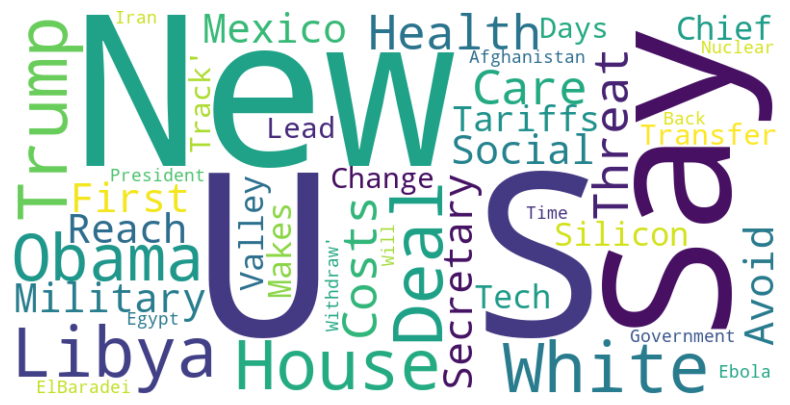

In [147]:
text = ' '.join(top_sentences_nltk)
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

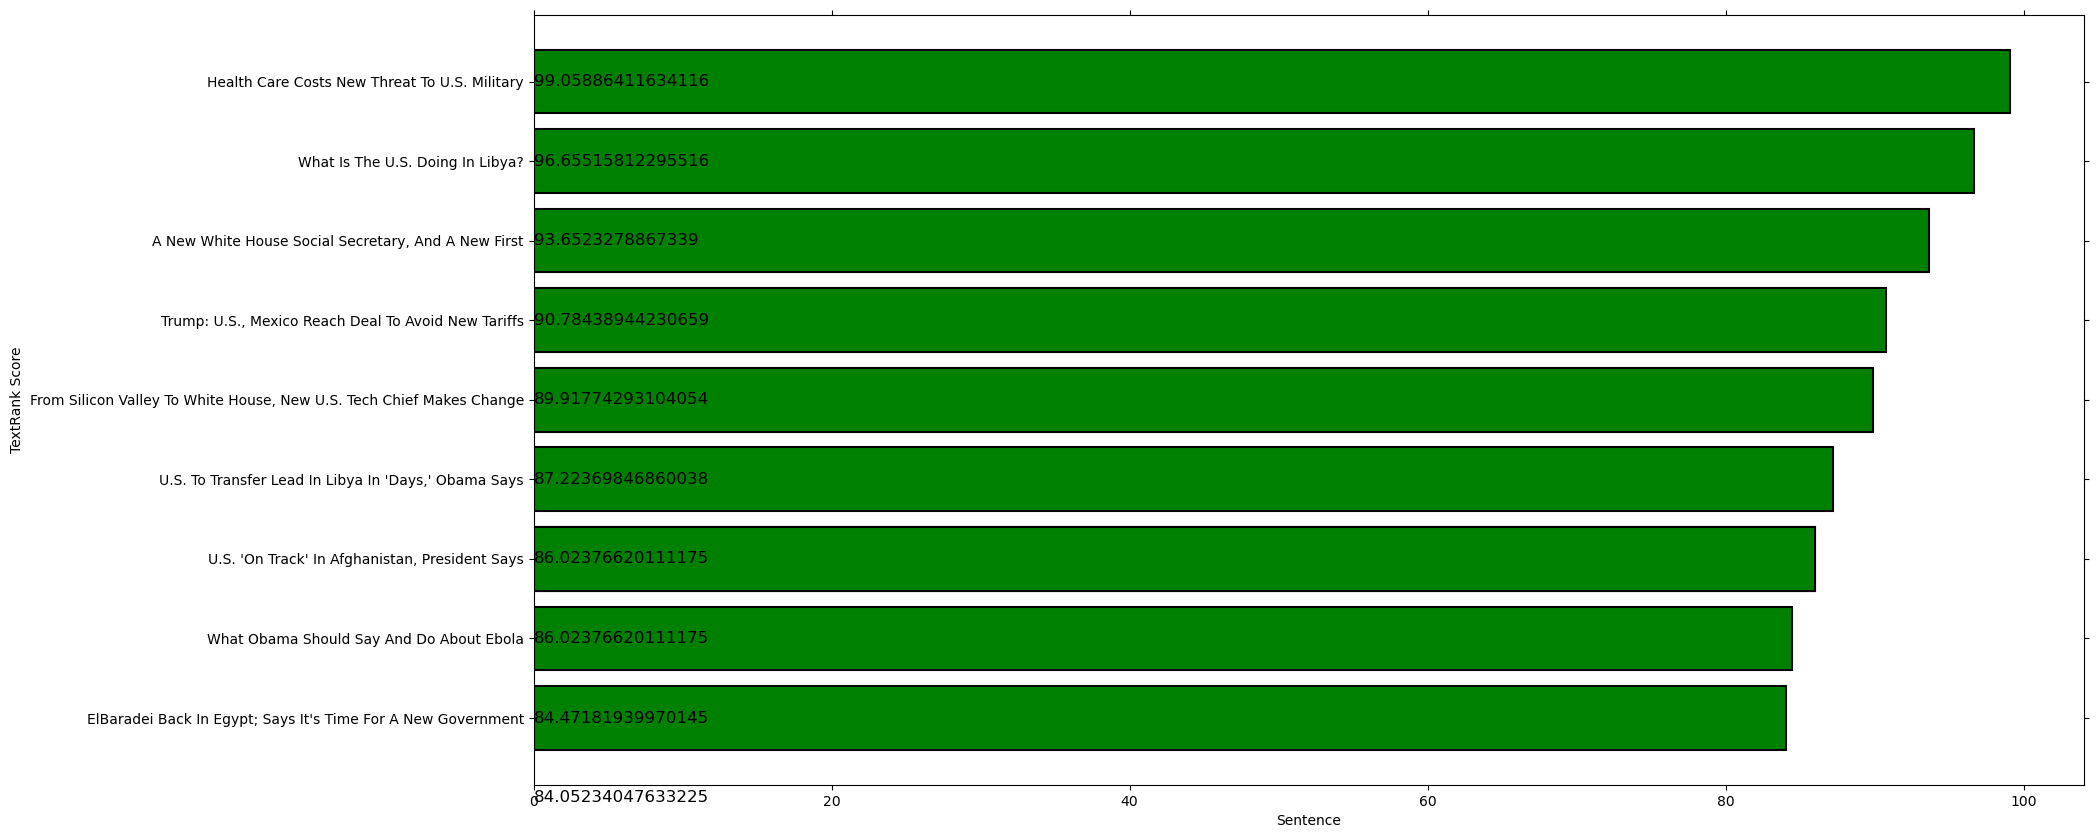

In [148]:
scores, sentences = zip(*ranked_sentences_nltk[:10])
plt.figure(figsize=(20, 10))
plt.barh(sentences, scores, color='green', edgecolor='black', linewidth=1.5, align='center')
plt.xlabel('Sentence')
plt.ylabel('TextRank Score')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
#arrange values in descending order
plt.gca().invert_yaxis()

#display values on bar
for i, score in enumerate(scores):
    plt.text(0.005, i, score, fontsize=12, verticalalignment='center')

plt.show()


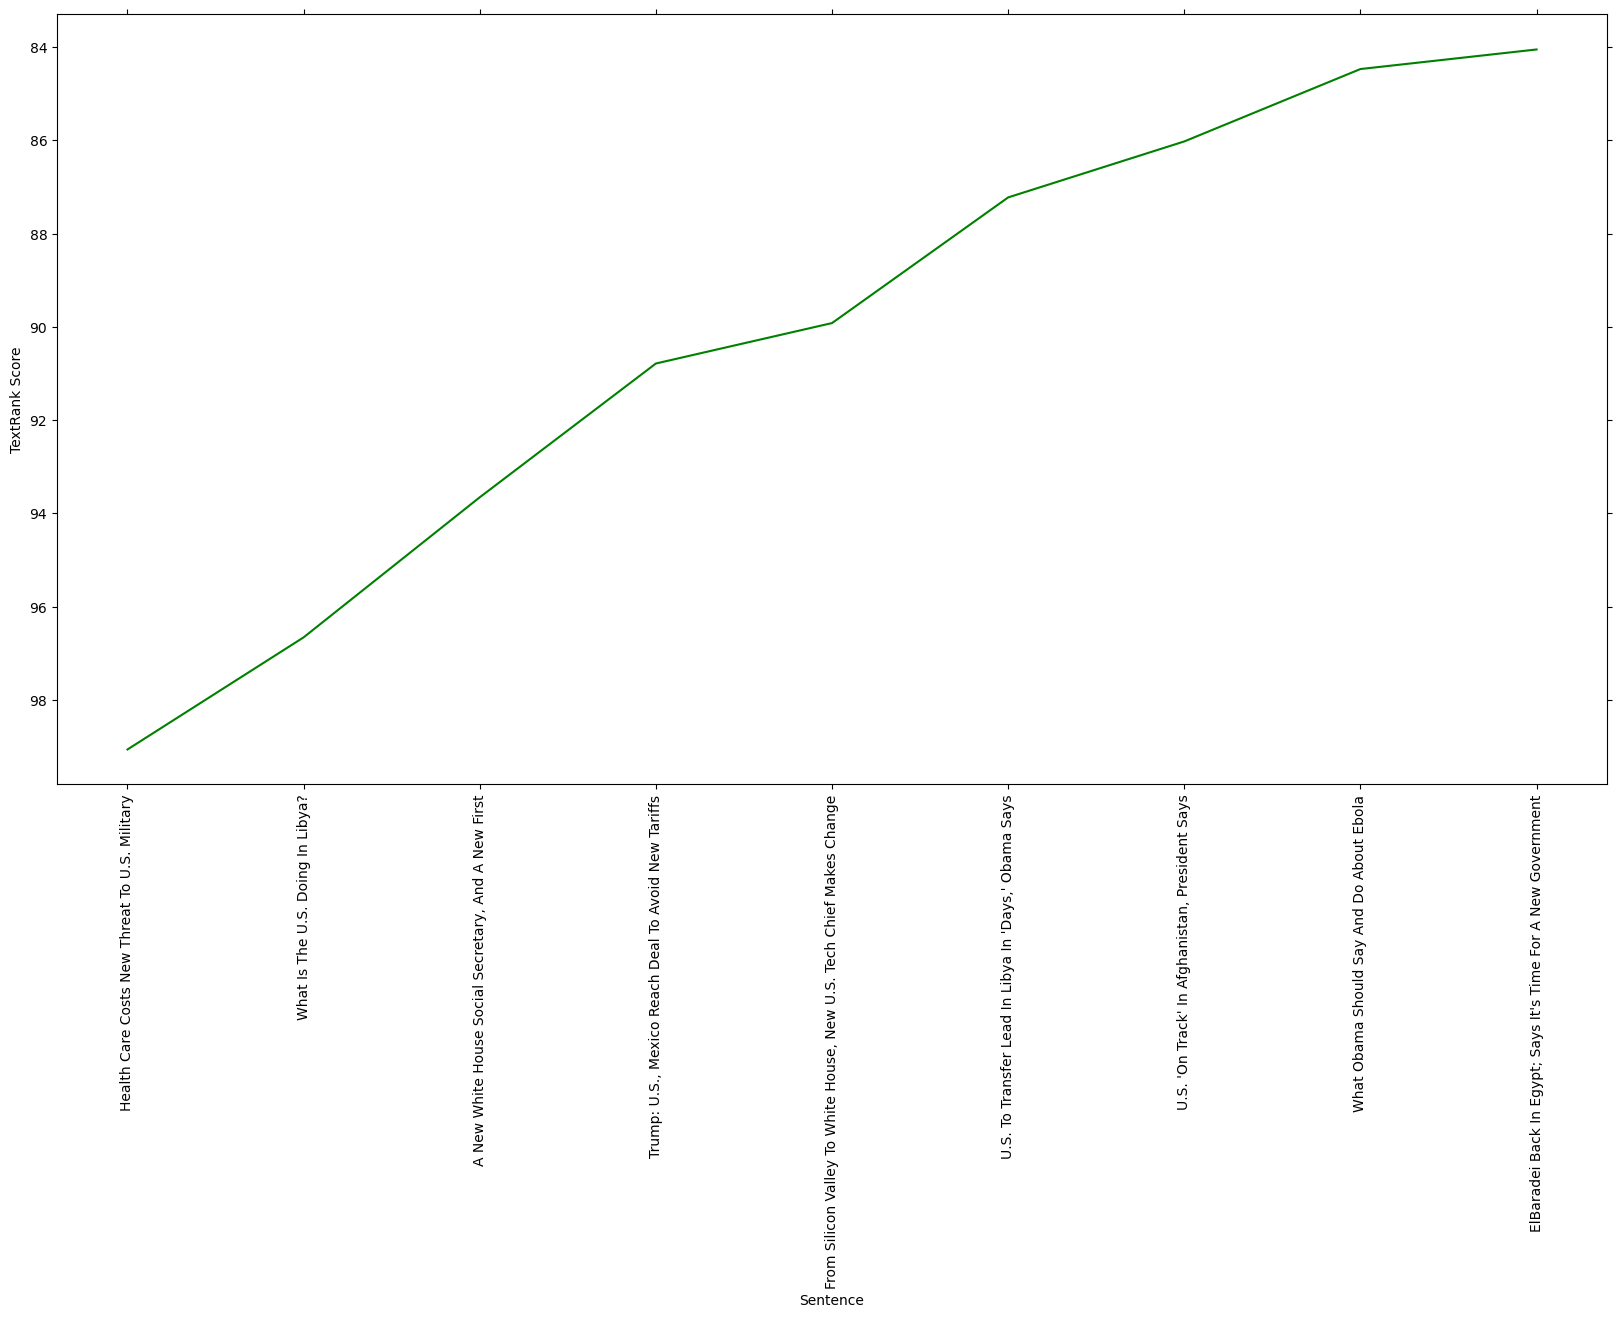

In [149]:
#create line chart of the top 10 most important sentences in the article

import matplotlib.pyplot as plt

scores, sentences = zip(*ranked_sentences_nltk[:10])
plt.figure(figsize=(20, 10))
plt.plot(sentences, scores, color='green', linewidth=1.5)
plt.xlabel('Sentence')
plt.xticks(rotation=90)
plt.ylabel('TextRank Score')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
#arrange values in descending order
plt.gca().invert_yaxis()


In [150]:
# Part Two (spaCy and scikit-learn):

In [151]:
# 2.1  Utilize spaCy for Part Two

In [152]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [153]:
# 2.2  Use the same "headlines.csv" dataset as the input file.

In [154]:
df_spacy = pd.read_csv("headlines.csv")
print(df_spacy.head())

       id                                           headline
0  524288  For Some, The Decision To Enlist Offers Direction
1  524289          Whither The Astronauts Without A Shuttle?
2  524292      Tour Winner May Not Be First Over Finish Line
3  262153  California College Students Walk Out Of Class ...
4  524298               New Theory On 'Shaken Baby Syndrome'


In [155]:
# 2.3  Preprocess the headlines using spaCy functions such as removing stop words, tokenization, stemming, and lemmatization.

In [156]:
#Remove stop words
df_spacy['filtered_headline'] = df_spacy['headline'].replace(to_replace=r'[^\w\s]', value='', regex = True)
df_spacy['filtered_headline'] = df_spacy['filtered_headline'].apply(lambda x: [token.text for token in nlp(x)])
df_spacy['filtered_headline'] = df_spacy['filtered_headline'].apply(lambda x: [token for token in x if not nlp.vocab[token].is_stop])
df_spacy['filtered_headline'] = df_spacy['filtered_headline'].apply(lambda x: ' '.join(x))
print(df_spacy.head())

       id                                           headline  \
0  524288  For Some, The Decision To Enlist Offers Direction   
1  524289          Whither The Astronauts Without A Shuttle?   
2  524292      Tour Winner May Not Be First Over Finish Line   
3  262153  California College Students Walk Out Of Class ...   
4  524298               New Theory On 'Shaken Baby Syndrome'   

                                   filtered_headline  
0                   Decision Enlist Offers Direction  
1                                 Astronauts Shuttle  
2                            Tour Winner Finish Line  
3  California College Students Walk Class Protest...  
4                    New Theory Shaken Baby Syndrome  


In [157]:
#Stemming
stemmer = PorterStemmer()
df_spacy['stemmed_headline'] = df_spacy['filtered_headline'].apply(lambda x: [token.text for token in nlp(x)])
df_spacy['stemmed_headline'] = df_spacy['stemmed_headline'].apply(lambda x: [stemmer.stem(word) for word in x])
df_spacy['stemmed_headline'] = df_spacy['stemmed_headline'].apply(lambda x: ' '.join(x))
print(df_spacy.head())

       id                                           headline  \
0  524288  For Some, The Decision To Enlist Offers Direction   
1  524289          Whither The Astronauts Without A Shuttle?   
2  524292      Tour Winner May Not Be First Over Finish Line   
3  262153  California College Students Walk Out Of Class ...   
4  524298               New Theory On 'Shaken Baby Syndrome'   

                                   filtered_headline  \
0                   Decision Enlist Offers Direction   
1                                 Astronauts Shuttle   
2                            Tour Winner Finish Line   
3  California College Students Walk Class Protest...   
4                    New Theory Shaken Baby Syndrome   

                                    stemmed_headline  
0                          decis enlist offer direct  
1                                   astronaut shuttl  
2                            tour winner finish line  
3  california colleg student walk class protest t...  
4  

In [158]:
#Lemmatization
df_spacy['lemmatized_headline'] = df_spacy['filtered_headline'].apply(lambda x: [token.text for token in nlp(x)])
df_spacy['lemmatized_headline'] = df_spacy['lemmatized_headline'].apply(lambda tokens: [token.lemma_ for token in nlp(' '.join(tokens))])
df_spacy['lemmatized_headline'] = df_spacy['lemmatized_headline'].apply(lambda x: ' '.join(x))
print(df_spacy.head())

       id                                           headline  \
0  524288  For Some, The Decision To Enlist Offers Direction   
1  524289          Whither The Astronauts Without A Shuttle?   
2  524292      Tour Winner May Not Be First Over Finish Line   
3  262153  California College Students Walk Out Of Class ...   
4  524298               New Theory On 'Shaken Baby Syndrome'   

                                   filtered_headline  \
0                   Decision Enlist Offers Direction   
1                                 Astronauts Shuttle   
2                            Tour Winner Finish Line   
3  California College Students Walk Class Protest...   
4                    New Theory Shaken Baby Syndrome   

                                    stemmed_headline  \
0                          decis enlist offer direct   
1                                   astronaut shuttl   
2                            tour winner finish line   
3  california colleg student walk class protest t...  

In [159]:
# 2.4  Perform Part-of-Speech (POS) tagging on the preprocessed headlines using spaCy's POS tagger

In [160]:
df_spacy['pos_tags_headline'] = df_spacy['lemmatized_headline'].apply(lambda x: [(token.text, token.pos_) for token in nlp(x)])
print(df_spacy.head())

       id                                           headline  \
0  524288  For Some, The Decision To Enlist Offers Direction   
1  524289          Whither The Astronauts Without A Shuttle?   
2  524292      Tour Winner May Not Be First Over Finish Line   
3  262153  California College Students Walk Out Of Class ...   
4  524298               New Theory On 'Shaken Baby Syndrome'   

                                   filtered_headline  \
0                   Decision Enlist Offers Direction   
1                                 Astronauts Shuttle   
2                            Tour Winner Finish Line   
3  California College Students Walk Class Protest...   
4                    New Theory Shaken Baby Syndrome   

                                    stemmed_headline  \
0                          decis enlist offer direct   
1                                   astronaut shuttl   
2                            tour winner finish line   
3  california colleg student walk class protest t...  

In [161]:
# 2.5  Perform Named Entity Recognition (NER) on the preprocessed headlines using spaCy's NER tagger

In [162]:
df_spacy['ner_tags_headline'] = df_spacy['lemmatized_headline'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])
print(df_spacy.head())

       id                                           headline  \
0  524288  For Some, The Decision To Enlist Offers Direction   
1  524289          Whither The Astronauts Without A Shuttle?   
2  524292      Tour Winner May Not Be First Over Finish Line   
3  262153  California College Students Walk Out Of Class ...   
4  524298               New Theory On 'Shaken Baby Syndrome'   

                                   filtered_headline  \
0                   Decision Enlist Offers Direction   
1                                 Astronauts Shuttle   
2                            Tour Winner Finish Line   
3  California College Students Walk Class Protest...   
4                    New Theory Shaken Baby Syndrome   

                                    stemmed_headline  \
0                          decis enlist offer direct   
1                                   astronaut shuttl   
2                            tour winner finish line   
3  california colleg student walk class protest t...  

In [163]:
# 2.6  Utilize spaCy's pipeline object to efficiently perform text processing tasks.

In [164]:
def preprocess_dataframe(df):
    df['filtered_headline'] = df['headline'].replace(to_replace=r'[^\w\s]', value='', regex = True)
    processed_data = list(nlp.pipe(df['filtered_headline'], disable=["parser"]))

    lemmatized_headline = [" ".join([token.lemma_ for token in doc if not token.is_stop]) for doc in processed_data]
    pos_tagged_headlines = [" ".join([f"{token.text} ({token.pos_})" for token in doc]) for doc in processed_data]
    ner_entities = [list(doc.ents) for doc in processed_data]

    return lemmatized_headline, pos_tagged_headlines, ner_entities

df_pipeline = pd.read_csv('headlines.csv')
emmatized_headline, pos_tags_headline, ner_tags_headline = preprocess_dataframe(df_pipeline)

df_pipeline['lemmatized_headline'] = lemmatized_headline
df_pipeline['pos_tags_headline'] = pos_tags_headline
df_pipeline['ner_tags_headline'] = ner_tags_headline


df_pipeline.head()

,id,headline,filtered_headline,lemmatized_headline,pos_tags_headline,ner_tags_headline
0,524288,"For Some, The Decision To Enlist Offers Direction",For Some The Decision To Enlist Offers Direction,decision enlist Offers Direction,For (ADP) Some (DET) The (DET) Decision (NOUN)...,[]
1,524289,Whither The Astronauts Without A Shuttle?,Whither The Astronauts Without A Shuttle,Astronauts Shuttle,Whither (NOUN) The (DET) Astronauts (PROPN) Wi...,[]
2,524292,Tour Winner May Not Be First Over Finish Line,Tour Winner May Not Be First Over Finish Line,Tour Winner Finish line,Tour (PROPN) Winner (PROPN) May (AUX) Not (PAR...,"[(Tour, Winner)]"
3,262153,California College Students Walk Out Of Class ...,California College Students Walk Out Of Class ...,California College Students walk Class Protest...,California (PROPN) College (PROPN) Students (P...,"[(California, College, Students, Walk)]"
4,524298,New Theory On 'Shaken Baby Syndrome',New Theory On Shaken Baby Syndrome,New Theory Shaken Baby Syndrome,New (PROPN) Theory (PROPN) On (ADP) Shaken (PR...,[]


In [165]:
# 2.7  Use scikit-learn's TfidfVectorizer and LinearSVC in a pipeline for text vectorization and classification.

In [166]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'positive'
    elif scores['compound'] < 0.05:
        return 'negative'
    else:
        return 'neutral'
    
df_spacy['sentiment'] = df_spacy['headline'].apply(get_sentiment_scores)


df_spacy.head()

,id,headline,filtered_headline,stemmed_headline,lemmatized_headline,pos_tags_headline,ner_tags_headline,sentiment
0,524288,"For Some, The Decision To Enlist Offers Direction",Decision Enlist Offers Direction,decis enlist offer direct,decision Enlist Offers Direction,"[(decision, NOUN), (Enlist, PROPN), (Offers, P...","[(Enlist Offers Direction, ORG)]",negative
1,524289,Whither The Astronauts Without A Shuttle?,Astronauts Shuttle,astronaut shuttl,Astronauts Shuttle,"[(Astronauts, PROPN), (Shuttle, PROPN)]","[(Astronauts Shuttle, PERSON)]",negative
2,524292,Tour Winner May Not Be First Over Finish Line,Tour Winner Finish Line,tour winner finish line,Tour Winner Finish Line,"[(Tour, PROPN), (Winner, PROPN), (Finish, PROP...","[(Tour Winner, PERSON)]",positive
3,262153,California College Students Walk Out Of Class ...,California College Students Walk Class Protest...,california colleg student walk class protest t...,California College Students walk Class Protest...,"[(California, PROPN), (College, PROPN), (Stude...","[(California College Students, ORG)]",negative
4,524298,New Theory On 'Shaken Baby Syndrome',New Theory Shaken Baby Syndrome,new theori shaken babi syndrom,New Theory Shaken Baby Syndrome,"[(New, PROPN), (Theory, PROPN), (Shaken, PROPN...",[],negative


In [167]:
X = df_spacy['lemmatized_headline']
y = df_spacy['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])
text_clf.fit(X_train, y_train)
predictions = text_clf.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, predictions)))
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))

Accuracy: 0.8875757575757576
[[2473   97]
 [ 274  456]]
              precision    recall  f1-score   support

    negative       0.90      0.96      0.93      2570
    positive       0.82      0.62      0.71       730

    accuracy                           0.89      3300
   macro avg       0.86      0.79      0.82      3300
weighted avg       0.88      0.89      0.88      3300



In [168]:
# 2.8  Generate a summary of the news headlines using the TextRank algorithm or other summarization techniques. 
# The summary will consist of the top 10 most important sentences in the article

In [169]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_spacy = tfidf_vectorizer.fit_transform(df_spacy['lemmatized_headline'])

print(tfidf_matrix_spacy)

  (0, 3162)	0.5459724978955913
  (0, 7540)	0.46290517022874783
  (0, 3689)	0.5459724978955913
  (0, 2879)	0.4353698042570144
  (1, 9911)	0.6329705600057974
  (1, 879)	0.7741758651404389
  (2, 6350)	0.4551528356758322
  (2, 4177)	0.5511530755066438
  (2, 11956)	0.4829696926515
  (2, 11093)	0.5057731304803887
  (3, 5136)	0.4342454156944156
  (3, 11267)	0.40121114531234703
  (3, 8522)	0.2862146650093524
  (3, 2122)	0.36817687493027845
  (3, 11755)	0.3643621693070594
  (3, 10522)	0.3229452350455113
  (3, 2238)	0.30735079841715973
  (3, 1722)	0.31854287243208734
  (4, 10733)	0.4937459125353477
  (4, 982)	0.42267514755520375
  (4, 9789)	0.5029555237285468
  (4, 10933)	0.5138481818218662
  (4, 7331)	0.2460822640564112
  (5, 8283)	0.4839197922278722
  (5, 3454)	0.5126611371226122
  :	:
  (9995, 11534)	0.3825789958628542
  (9995, 130)	0.3950520003818422
  (9995, 2808)	0.28612620207306755
  (9995, 10965)	0.2937973701219067
  (9995, 2823)	0.24807104559997278
  (9995, 8973)	0.27861367637396917
  (

In [170]:
sentence_similarity_matrix_spacy = cosine_similarity(tfidf_matrix_spacy, tfidf_matrix_spacy)
num_sentences_spacy = sentence_similarity_matrix_spacy.shape[0]
scoresn = np.zeros(num_sentences_spacy)
for i in range(num_sentences_spacy):
    for j in range(num_sentences_spacy):
        if i != j:
            scoresn[i] += sentence_similarity_matrix_spacy[i][j]
ranked_sentences_spacy = sorted(((scoresn[i], sentence) for i, sentence in enumerate(df_spacy['headline'])), reverse=True)
top_sentences_spacy = []
seen_sentences_spacy = set()
for score, sentence in ranked_sentences_spacy:
    if sentence not in seen_sentences_spacy:
        top_sentences_spacy.append(sentence)
        seen_sentences_spacy.add(sentence)

    if len(top_sentences_spacy) == 10:
        break
for sentence in top_sentences_spacy:
    print(sentence)


Obama Says Gadhafi 'Must Leave' Power In Libya
A New White House Social Secretary, And A New First
Clinton, Obama Attack Health Care Plans
Obama: Democrats Won't Stop Tax Deal
President Trump Doesn't Need To Release His Tax Returns — For Now
What Obama Should Say And Do About Ebola
Tax Deal Draws Fire; Obama Says It's Needed
Obama Gives New Details On America's Effort To Fight Ebola
ElBaradei Back In Egypt; Says It's Time For A New Government
Even If House Is Lost, Obama Finds Hope In History


In [172]:
# 2.9 Visualize the summary using matplotlib or other visualization tools.

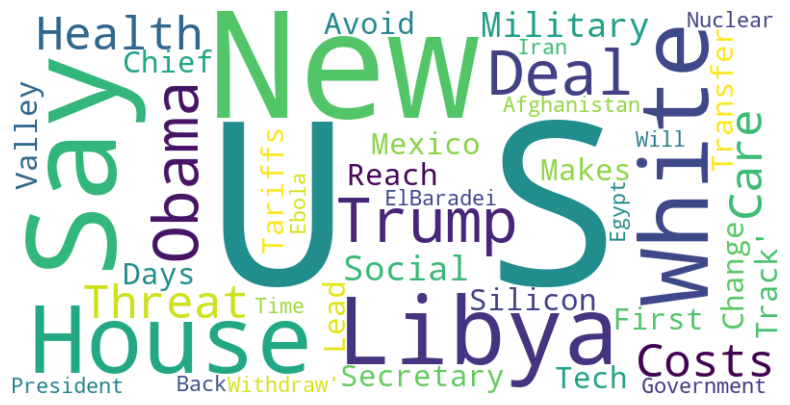

In [173]:
text = ' '.join(top_sentences_spacy)

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

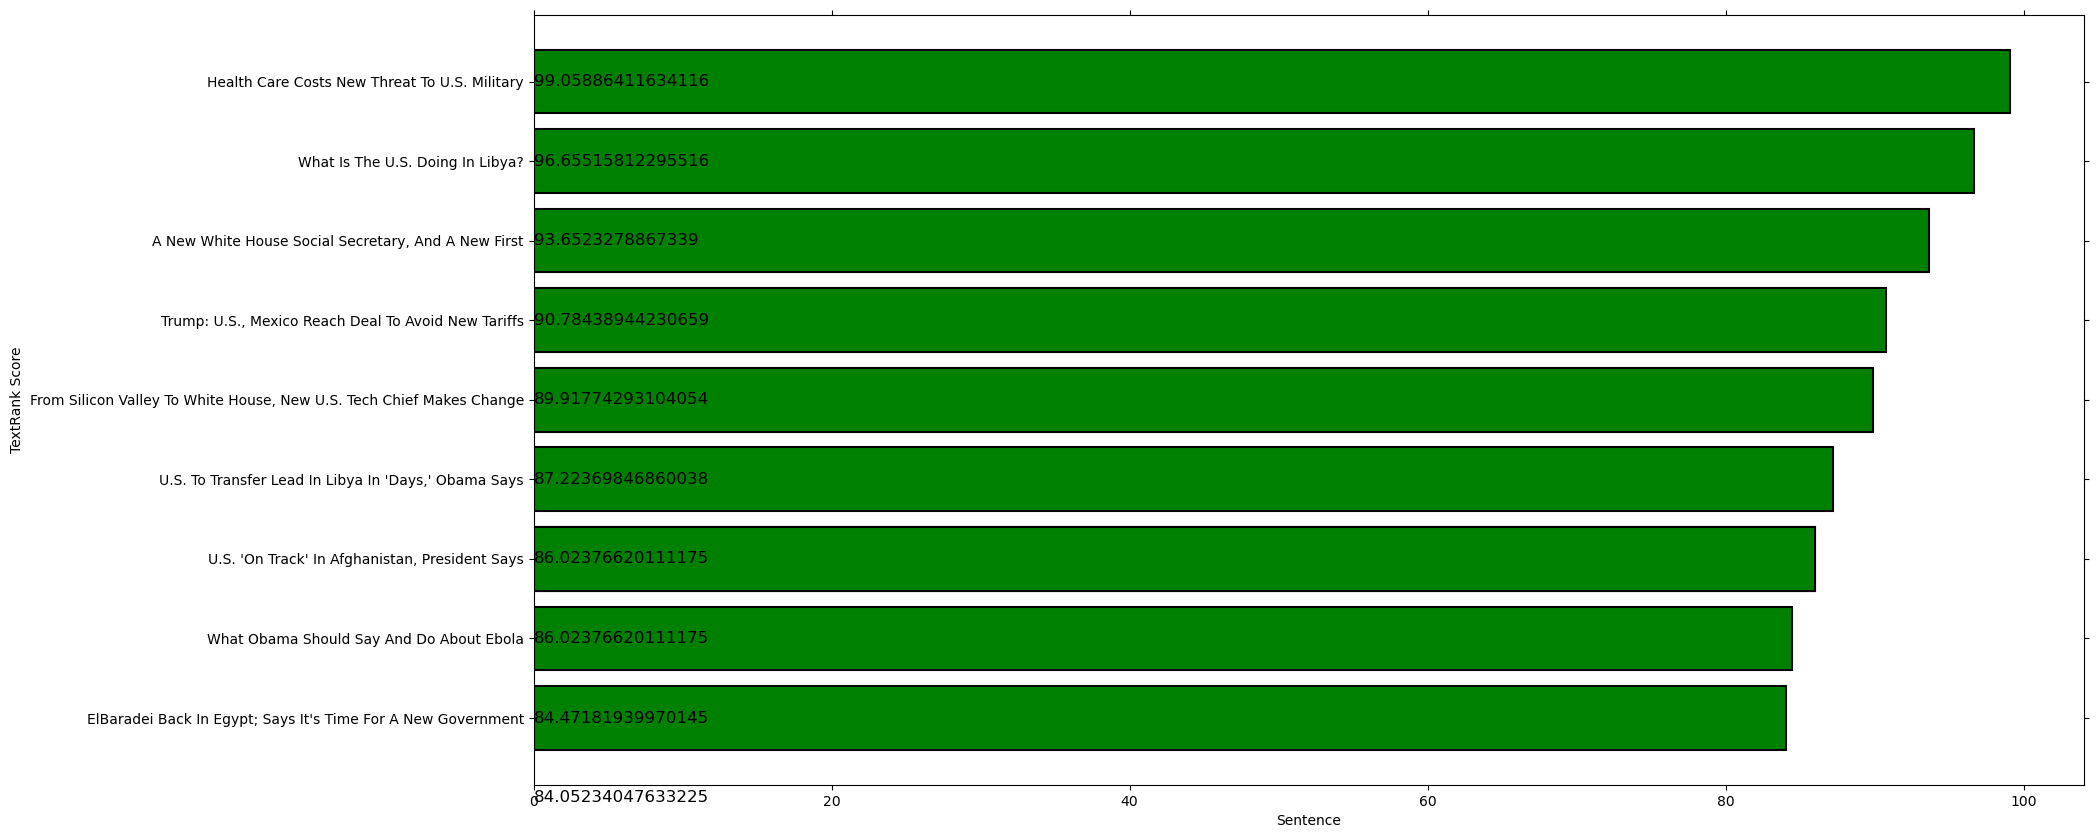

In [174]:
scores, sentences = zip(*ranked_sentences_nltk[:10])
plt.figure(figsize=(20, 10))
plt.barh(sentences, scores, color='green', edgecolor='black', linewidth=1.5, align='center')
plt.xlabel('Sentence')
plt.ylabel('TextRank Score')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
#arrange values in descending order
plt.gca().invert_yaxis()

#display values on bar
for i, score in enumerate(scores):
    plt.text(0.005, i, score, fontsize=12, verticalalignment='center')

plt.show()


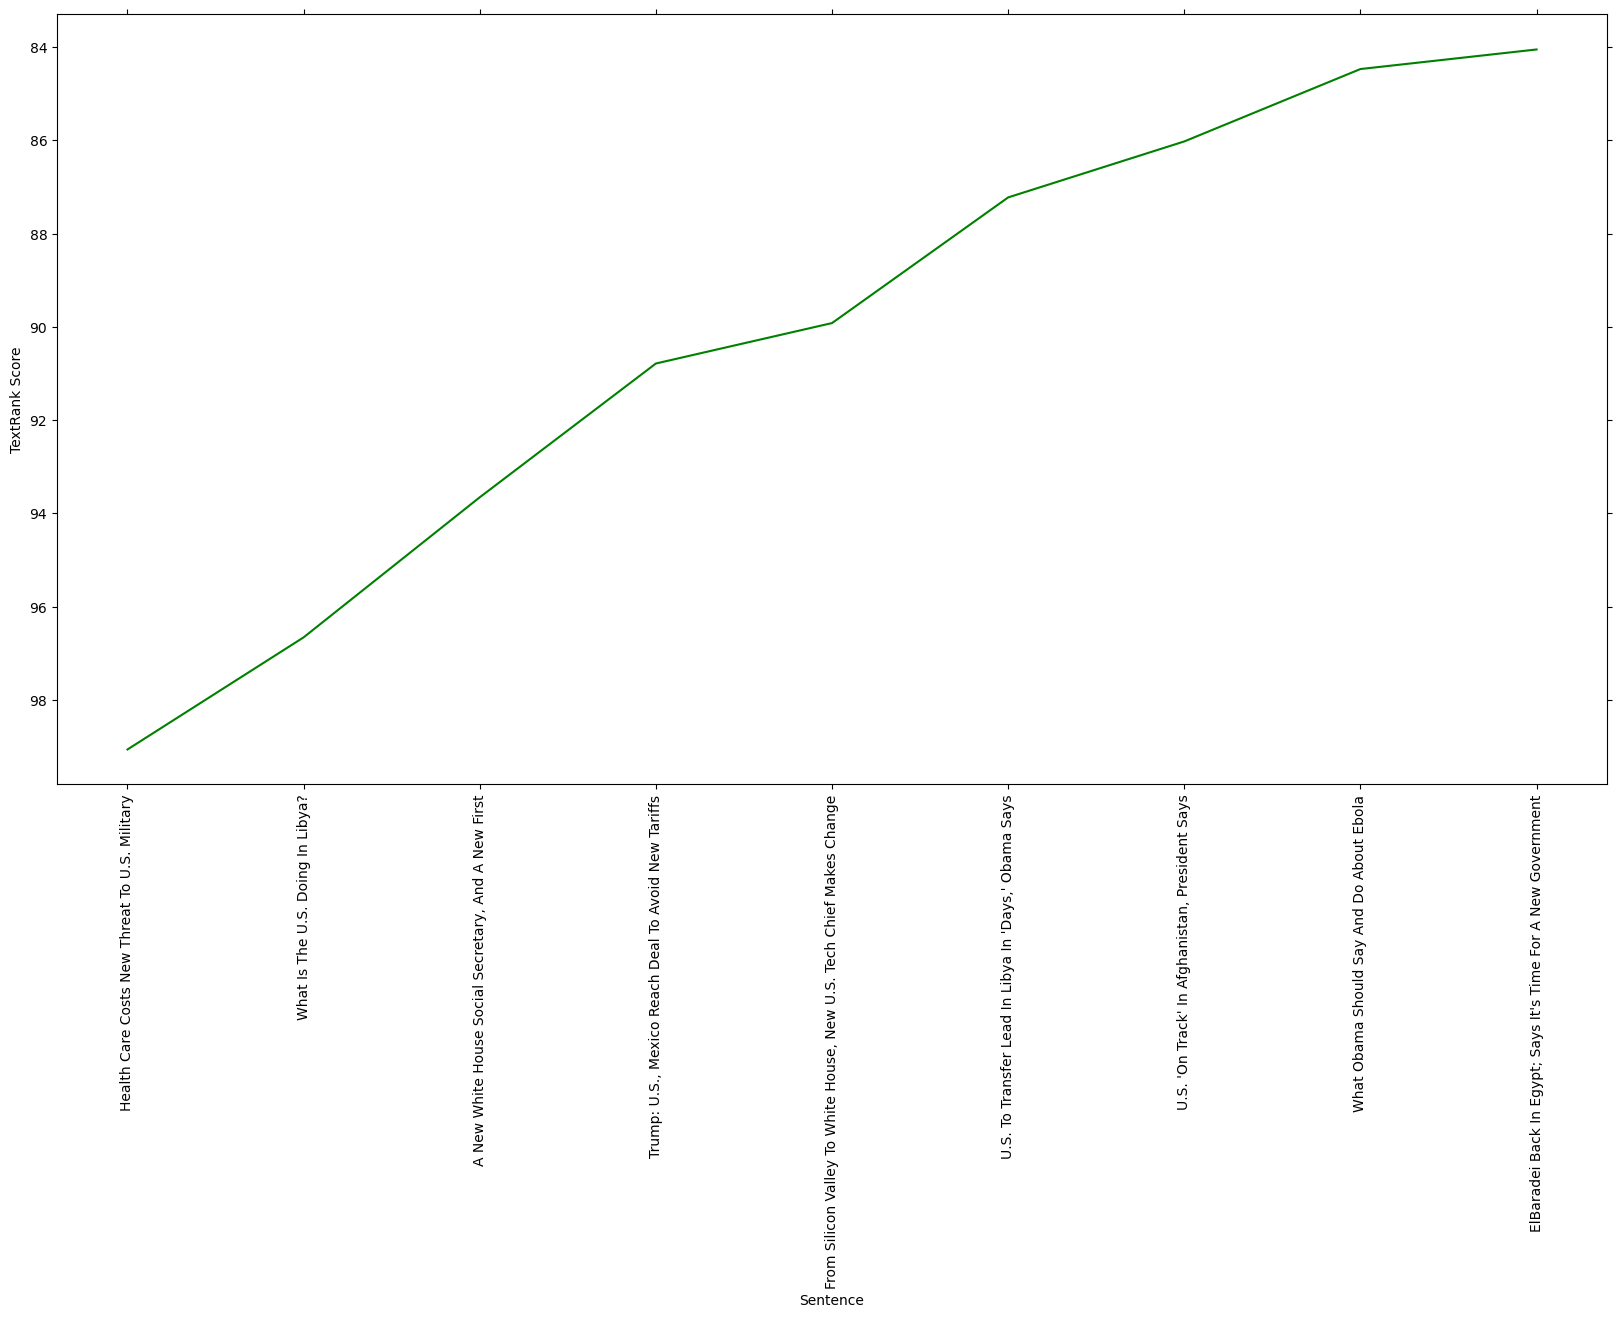

In [175]:
#create line chart of the top 10 most important sentences in the article

import matplotlib.pyplot as plt

scores, sentences = zip(*ranked_sentences_nltk[:10])
plt.figure(figsize=(20, 10))
plt.plot(sentences, scores, color='green', linewidth=1.5)
plt.xlabel('Sentence')
plt.xticks(rotation=90)
plt.ylabel('TextRank Score')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
#arrange values in descending order
plt.gca().invert_yaxis()


In [177]:
nltk_df = pd.DataFrame({'NLTK Summaries': top_sentences_nltk})
spacy_df = pd.DataFrame({'spaCy Summaries': top_sentences_spacy})


result_df = pd.concat([nltk_df, spacy_df], axis=1)


from IPython.display import display, HTML
display(HTML(result_df.to_html(index=False)))

NLTK Summaries,spaCy Summaries
Health Care Costs New Threat To U.S. Military,Obama Says Gadhafi 'Must Leave' Power In Libya
What Is The U.S. Doing In Libya?,"A New White House Social Secretary, And A New First"
"A New White House Social Secretary, And A New First","Clinton, Obama Attack Health Care Plans"
"Trump: U.S., Mexico Reach Deal To Avoid New Tariffs",Obama: Democrats Won't Stop Tax Deal
"From Silicon Valley To White House, New U.S. Tech Chief Makes Change",President Trump Doesn't Need To Release His Tax Returns — For Now
"U.S. To Transfer Lead In Libya In 'Days,' Obama Says",What Obama Should Say And Do About Ebola
"U.S. 'On Track' In Afghanistan, President Says",Tax Deal Draws Fire; Obama Says It's Needed
What Obama Should Say And Do About Ebola,Obama Gives New Details On America's Effort To Fight Ebola
ElBaradei Back In Egypt; Says It's Time For A New Government,ElBaradei Back In Egypt; Says It's Time For A New Government
Trump: U.S. 'Will Withdraw' From Iran Nuclear Deal,"Even If House Is Lost, Obama Finds Hope In History"
